# 简介

PCA是一种统计方法，通过正交变换将一组可能存在相关性的变量转换为一组线性不相关的变量，转换后的这组变量叫主成分。  

应用领域：  
* 降维
* 高维数据集的探索与可视化  
* 数据压缩  
* 数据预处理

PCA算法本质就是找一些投影方向，使得数据在这些投影方向上的方差最大。   
下面左图的投影方差更大。

<img src="img/PCA1.png" align="left" width="300">
<img src="img/PCA2.png" align='right' width="300">

# 基于协方差矩阵的特征值分解算法

## 算法

1. 均值归一化。计算各个特征均值，然后令 $x_j=x_j-\mu_j$。如果特征在不同数量级上，还需要将其除以标准差，即 $x_j=\frac{x_j-\mu_j}{\sigma_j}$  
2. 计算协方差矩阵 $Cov(X,X)=\Sigma=\frac{1}{m-1}\sum_{i=1}^m X^T\cdot X$  
3. 计算协方差矩阵 $\Sigma$ 的特征向量 $u^{(i)}$  
`eigenvalues,eigenvectors = np.linalg.eig(sigma)`
4. 取 $u$ 的前 $k$ 维，得到 $n\times k$ 的矩阵，用 $U_{reduce}$ 表示，则降维后的数据 $z^{(i)}$
$$z^{(i)}=U^T_{reduce}\times x^{(i)} \\
Z=X\times U_{reduce}$$

## 代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def loaddata(path):
    data = np.loadtxt(path,delimiter=',')
    return data

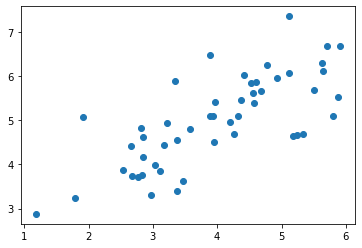

In [3]:
X = loaddata("data/pca_data.csv")
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
# 特征归一化
def featureNormalize(X):
    mu = np.mean(X,axis=0).reshape(1,-1)
    sigma = np.std(X,axis=0,ddof=1).reshape(1,-1)
    X = (X-mu)/sigma
    return X,mu,sigma

In [5]:
def pca(X,K):
    m = X.shape[0]
    sigma = X.T@X/(m-1)

    #返回的特征向量要是排序后的
    eigenvalues,eigenvectors = np.linalg.eig(sigma)
    index = np.argsort(-eigenvalues)          # 依照特征值进行从大到小排序
    eigenvectors = eigenvectors[:,index]      #特征向量对应到特征值的顺序
    u_reduce = eigenvectors[:,0:K]
    
    return X@u_reduce,eigenvectors

In [6]:
X,mu,sigma = featureNormalize(X)
Z,eigenvectors = pca(X,1)
print(Z)

[[ 1.48127391]
 [-0.91291229]
 [ 1.21208656]
 [ 1.62734009]
 [ 1.26042409]
 [-0.96700223]
 [ 1.25605967]
 [-2.31794969]
 [-0.02968998]
 [-0.77386123]
 [-0.62532902]
 [-0.54724542]
 [-0.08878025]
 [-0.520569  ]
 [ 1.548434  ]
 [-1.89684585]
 [-0.87788459]
 [ 0.94646472]
 [-2.30653955]
 [-0.4731351 ]
 [-2.19518524]
 [ 0.38509662]
 [-1.76688508]
 [ 0.0512347 ]
 [ 1.64838858]
 [ 0.50302869]
 [-1.2246766 ]
 [-1.16020771]
 [ 0.83375215]
 [-0.00686207]
 [-0.22565101]
 [-1.49788781]
 [ 1.3252858 ]
 [-0.58656923]
 [ 0.67225099]
 [-1.33938187]
 [ 1.67053477]
 [-1.37836539]
 [ 2.53419743]
 [-0.27570789]
 [-0.96695982]
 [ 0.8792732 ]
 [ 1.28362916]
 [-0.97972108]
 [ 1.79450473]
 [-0.26923019]
 [ 3.16088618]
 [ 1.20080033]
 [ 0.36423084]
 [-1.42814204]]


In [7]:
# 把降维后的数据还原成原来的数据
def recoverData(Z,U,K):
    U_reduce = U[:,0:K]
    X_rec = Z@U_reduce.T
    return X_rec

In [8]:
def plotData(X_orgin,X_rec):
    plt.scatter(X_orgin[:,0],X_orgin[:,1])
    plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
    plt.show()

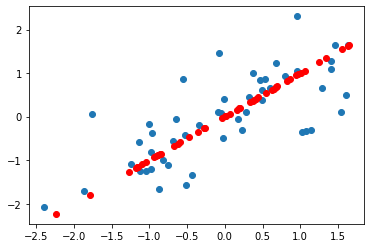

In [9]:
X_rec = recoverData(Z,eigenvectors,1)
plotData(X,X_rec)

# 基于数据矩阵的奇异值分解算法

## 算法

1. 均值归一化。计算各个特征均值，然后令 $x_j=x_j-\mu_j$。如果特征在不同数量级上，还需要将其除以标准差，即 $x_j=\frac{x_j-\mu_j}{\sigma_j}$  
2. 对数据矩阵进行SVD分解：`u,s,v^T=np.linalg.svd(X,full_matrices=0)`  
    * $X_{m\times n}=U_{m\times m}\Sigma_{m\times n}V^T_{n\times n}$  
    * $\Sigma$ 除对角线以外的元素都为 $0$，对角线元素称为奇异值  
    * $U^TU=I,V^TV=I$
3. 取前 $r$ 个特征，$X_{m\times n}\approx U_{m\times r}\Sigma_{r\times r}V^T_{r\times n}$，则降维后的数据 $z^{(i)}$
$$z^{(i)}=v\times x^{(i)} \\
Z=X\times (v^T)^T$$

## 代码实现

In [10]:
def pca(X,K):
    u,s,vT = np.linalg.svd(X,full_matrices=0)
    
    return X@vT.T[:,0:K],u,s,vT

In [11]:
X,mu,sigma = featureNormalize(X)
Z,u,s,vT = pca(X,1)
print(Z)

[[-1.48127391]
 [ 0.91291229]
 [-1.21208656]
 [-1.62734009]
 [-1.26042409]
 [ 0.96700223]
 [-1.25605967]
 [ 2.31794969]
 [ 0.02968998]
 [ 0.77386123]
 [ 0.62532902]
 [ 0.54724542]
 [ 0.08878025]
 [ 0.520569  ]
 [-1.548434  ]
 [ 1.89684585]
 [ 0.87788459]
 [-0.94646472]
 [ 2.30653955]
 [ 0.4731351 ]
 [ 2.19518524]
 [-0.38509662]
 [ 1.76688508]
 [-0.0512347 ]
 [-1.64838858]
 [-0.50302869]
 [ 1.2246766 ]
 [ 1.16020771]
 [-0.83375215]
 [ 0.00686207]
 [ 0.22565101]
 [ 1.49788781]
 [-1.3252858 ]
 [ 0.58656923]
 [-0.67225099]
 [ 1.33938187]
 [-1.67053477]
 [ 1.37836539]
 [-2.53419743]
 [ 0.27570789]
 [ 0.96695982]
 [-0.8792732 ]
 [-1.28362916]
 [ 0.97972108]
 [-1.79450473]
 [ 0.26923019]
 [-3.16088618]
 [-1.20080033]
 [-0.36423084]
 [ 1.42814204]]


In [12]:
def recoverData(Z,vT,K):
    V_reduce = vT[:,0:K]
    X_rec = Z@V_reduce.T
    return X_rec

In [13]:
def plotData(X_orgin,X_rec):
    plt.scatter(X_orgin[:,0],X_orgin[:,1])
    plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
    plt.show()

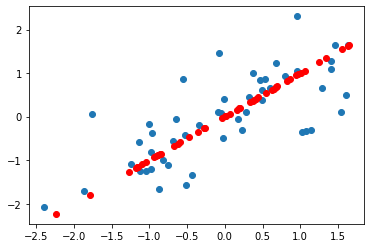

In [14]:
X_rec = recoverData(Z,vT,1)
plotData(X,X_rec)

# sklearn实现PCA

## 选取主成分个数

计算前 $k$ 个样本的累积贡献率：
$$\frac{\sum_{i=1}^k S_{ii}}{\sum_{i=1}^m S_{ii}}$$  
$S_{ii}$ 是数据矩阵 $X$ 的非零特征值，特征值从大到小排序。累积贡献率越大越好，如等于 $0.99$，表示原数据 $99%$ 的信息都保留了下来。

## sklearn实现

In [15]:
import scipy.io
from sklearn.decomposition import PCA

In [16]:
X = loaddata("data/pca_data.csv")
model = PCA(n_components=1)         #定义PCA
Z = model.fit_transform(X)          #生成降维后数据
Z

array([[ 1.49876595],
       [-0.95839024],
       [ 1.40325172],
       [ 1.76421694],
       [ 1.40760243],
       [-0.87367998],
       [ 1.27050164],
       [-2.5506712 ],
       [-0.01469839],
       [-0.83694188],
       [-0.70212917],
       [-0.58711016],
       [-0.12493311],
       [-0.74690506],
       [ 1.67629396],
       [-2.10275704],
       [-0.9594953 ],
       [ 1.11633715],
       [-2.37070273],
       [-0.69001651],
       [-2.39397485],
       [ 0.44284714],
       [-1.98340505],
       [-0.01058959],
       [ 1.83205377],
       [ 0.62719172],
       [-1.33171608],
       [-1.4546727 ],
       [ 1.01919098],
       [ 0.01489202],
       [-0.07212622],
       [-1.78539513],
       [ 1.41318051],
       [-0.82644523],
       [ 0.75167377],
       [-1.40551081],
       [ 1.82309802],
       [-1.59458841],
       [ 2.80783613],
       [-0.32551527],
       [-0.98578762],
       [ 0.98465469],
       [ 1.38952836],
       [-1.03742062],
       [ 1.87686597],
       [-0

In [17]:
print("主成分个数=",model.n_components)
print("贡献比=",model.explained_variance_ratio_)
print("特征的方差=",model.explained_variance_)

主成分个数= 1
贡献比= [0.87062385]
特征的方差= [2.10987818]


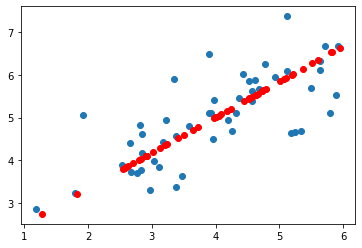

In [18]:
X_rec = model.inverse_transform(Z)    #还原数据
plotData(X,X_rec)

# 案例：照片压缩

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 读取数据

**读取照片**

In [20]:
img = mpimg.imread("data/jjq.jpg")

**显示照片**

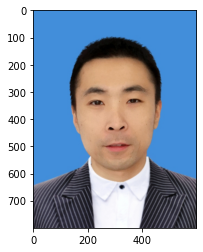

In [21]:
plt.imshow(img)
plt.show()

**查看照片维度**

In [22]:
img.shape    # 800*600,rgb3个通道

(800, 600, 3)

## 数据预处理

**把照片变成一个二维数组**

In [23]:
X = img.reshape(1200,1200)
X

array([[ 66, 142, 218, ...,  66, 142, 218],
       [ 66, 142, 218, ...,  66, 142, 218],
       [ 66, 142, 218, ...,  66, 142, 218],
       ...,
       [ 98,  97, 113, ...,  89,  86, 107],
       [ 92,  89, 108, ...,  36,  34,  45],
       [ 60,  59,  73, ...,  30,  29,  34]], dtype=uint8)

**数据标准化**

In [24]:
X = StandardScaler().fit_transform(X)
X

array([[-0.65158734,  0.26402337,  0.94608856, ..., -0.64756895,
         0.28112662,  0.96089318],
       [-0.65158734,  0.26402337,  0.94608856, ..., -0.64756895,
         0.28112662,  0.96089318],
       [-0.65158734,  0.26402337,  0.94608856, ..., -0.64756895,
         0.28112662,  0.96089318],
       ...,
       [-0.2076543 , -0.58135238, -0.50179511, ..., -0.33043172,
        -0.75318539, -0.55720635],
       [-0.29089175, -0.73164141, -0.57074196, ..., -1.0612262 ,
        -1.71361797, -1.40515384],
       [-0.73482479, -1.29522524, -1.05336985, ..., -1.14395766,
        -1.80596725, -1.55559613]])

**使用PCA降维**

In [25]:
model = PCA(n_components=50)
Z = model.fit_transform(X)
print(Z.shape)

(1200, 50)


In [26]:
print("贡献比=",np.sum(model.explained_variance_ratio_))

贡献比= 0.9837090615966596


**数据还原**

In [27]:
X_rec = model.inverse_transform(Z)
X_rec = X_rec.reshape(800,600,3)

**显示还原后的照片**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


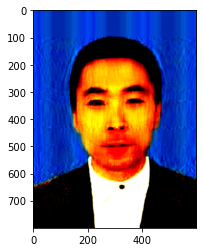

In [28]:
plt.imshow(X_rec)
plt.show()